<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Plotting-training-and-test-data-samples" data-toc-modified-id="Plotting-training-and-test-data-samples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting training and test data samples</a></span></li><li><span><a href="#Define-Class-for-kNN" data-toc-modified-id="Define-Class-for-kNN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Define Class for kNN</a></span></li></ul></div>

## Import modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Load data

In [30]:
trainData = np.array([[2.78,  2.55,  0],
                  [1.46,  2.36,  0],
                  [3.39,  4.40,  0],
                  [1.38,  1.85,  0],
                  [3.06,  3.00,  0],
                  [7.62,  2.75,  1],
                  [5.33,  2.08,  1],
                  [6.92,  1.77,  1],
                  [8.67, -0.24,  1],
                  [7.67,  3.50,  1]])

testData = np.array([[3,  2],
                 [4.4,2],
                 [7,  2]])
                 
print(trainData.shape)
print(testData.shape)

(10, 3)
(3, 2)


## Plotting training and test data samples

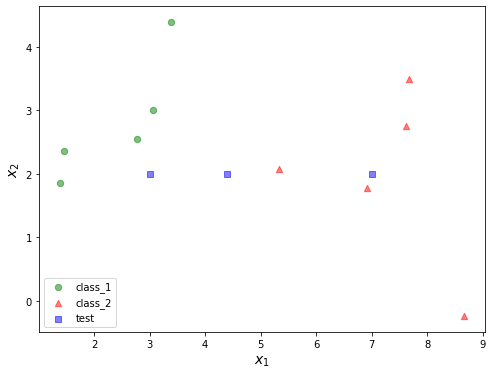

In [31]:
_, ax = plt.subplots(figsize=(8, 6))
ax.scatter(trainData[trainData[:,2] == 0][:,0], 
        trainData[trainData[:,2] == 0][:,1], 
        marker='o', color='green', s=40, alpha=0.5, label='class_1')

ax.scatter(trainData[trainData[:,2] == 1][:,0], 
           trainData[trainData[:,2] == 1][:,1],
           marker='^', color='red', s=40, alpha=0.5, label='class_2')

ax.scatter(testData[:,0], testData[:,1], 
        marker='s', color='blue', s=40, alpha=0.5, label='test')

plt.legend(loc='lower left') 
plt.ylabel('$x_2$', size=14)
plt.xlabel('$x_1$', size=14)
plt.show()

## Define Class for kNN

In [32]:
from math import sqrt
import numpy as np

class kNN():
    def __init__(self,k=1):
        self.k = k
        
    # calculating Euclidean distance
    def euclideanDistance(self, row1, row2):
        distance = 0.0
        for i in range(len(row1)):            
            distance += (row1[i] - row2[i])**2
        return sqrt(distance)

    # Locate the most similar neighbors
    def getNeighbors(self, train, testRow):
        distances = list()
        for trainRow in train:
            dist = self.euclideanDistance(testRow, trainRow[:-1])
            distances.append((trainRow, dist))
            
        distances.sort(key=lambda tup: tup[1])
        neighbors = list()
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors
    
    # Make a classification prediction with neighbors
    def predictClass(self,train, testRow):
        neighbors = self.getNeighbors(train, testRow)
        outputValues = [row[-1] for row in neighbors]
        prediction = max(set(outputValues), key=outputValues.count)
        return prediction

In [34]:
instance = kNN(k=3)
prediction = instance.predictClass(trainData, testData[1])
print("Predicted Class is ",prediction)

Predicted Class is  0.0
